In [14]:
import pandas as pd 
from sklearn.model_selection import train_test_split

#load data, separate features 
data = pd.read_csv("synthetic_credit_card_approval.csv")
X = data.drop(["Target"], axis=1)
y = data["Target"]

# Break into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preview the data
print("Data successfully loaded!\n")
X_train.head()

Data successfully loaded!



,Group,Income,Monthly_Housing_Cost,Num_Children,Own_Car,Own_Housing
288363,1,100000,3199.13,1,1,1
64982,0,100000,3452.20,0,0,1
227641,0,80000,3033.16,1,0,0
137672,0,70000,2507.21,3,0,1
12758,0,70000,2473.60,1,0,0


In [13]:
#train model and make preds 
from sklearn import tree 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib as plt 
#classifier
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
#fit data to clf
clf.fit(X_train, y_train)
#get predictions from clf 
preds = clf.predict(X_test)



Total approvals: 69869
Group A: 21930 (31.39% of approvals)
Group B: 47939 (68.61% of approvals)

Overall accuracy: 94.37%
Group A: 91.1%
Group B: 97.63%

Sensitivity / True positive rate:
Group A: 83.17%
Group B: 97.93%
Total approvals: 69869
Group A: 60396 (86.44% of approvals)
Group B: 9473 (13.56% of approvals)

Overall accuracy: 94.37%
Group A: 94.34%
Group B: 94.57%

Sensitivity / True positive rate:
Group A: 92.69%
Group B: 93.13%


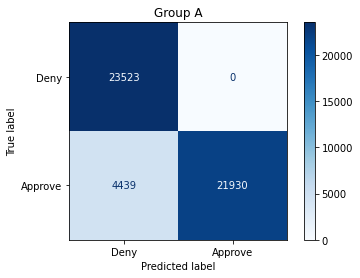

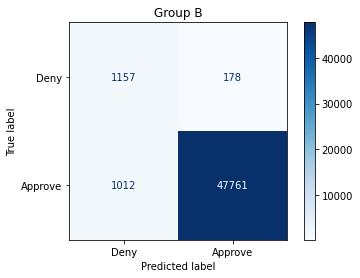

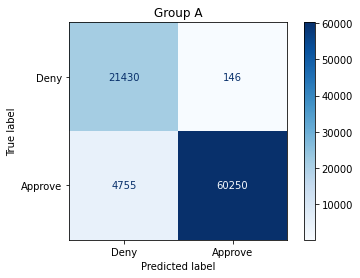

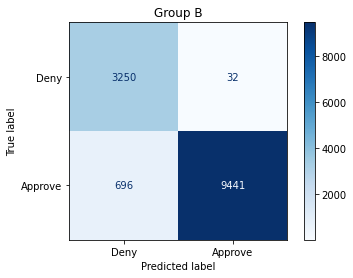

In [28]:
# Function to plot confusion matrix
def plot_confusion_matrix(estimator, X, y_true, y_pred, display_labels=["Deny", "Approve"],
                          include_values=True, xticks_rotation='horizontal', values_format='',
                          normalize=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    return cm, disp.plot(include_values=include_values, cmap=cmap, xticks_rotation=xticks_rotation,
                     values_format=values_format)



# Function to evaluate the fairness of the model
def get_stats(X, y, model, group_one, preds):
        
    y_zero, preds_zero, X_zero = y[group_one==False], preds[group_one==False], X[group_one==False]
    y_one, preds_one, X_one = y[group_one], preds[group_one], X[group_one]
    
    print("Total approvals:", preds.sum())
    print("Group A:", preds_zero.sum(), "({}% of approvals)".format(round(preds_zero.sum()/sum(preds)*100, 2)))
    print("Group B:", preds_one.sum(), "({}% of approvals)".format(round(preds_one.sum()/sum(preds)*100, 2)))
    
    print("\nOverall accuracy: {}%".format(round((preds==y).sum()/len(y)*100, 2)))
    print("Group A: {}%".format(round((preds_zero==y_zero).sum()/len(y_zero)*100, 2)))
    print("Group B: {}%".format(round((preds_one==y_one).sum()/len(y_one)*100, 2)))
    
    cm_zero, disp_zero = plot_confusion_matrix(model, X_zero, y_zero, preds_zero)
    disp_zero.ax_.set_title("Group A")
    cm_one, disp_one = plot_confusion_matrix(model, X_one, y_one, preds_one)
    disp_one.ax_.set_title("Group B")
    
    print("\nSensitivity / True positive rate:")
    print("Group A: {}%".format(round(cm_zero[1,1] / cm_zero[1].sum()*100, 2)))
    print("Group B: {}%".format(round(cm_one[1,1] / cm_one[1].sum()*100, 2)))
#for group=1     
get_stats(X_test, y_test, clf, X_test["Group"] == 1, preds)
#for group = numChildren > 1 
get_stats(X_test, y_test, clf, X_test["Num_Children"] == 0, preds)